In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
import pandas as pd      
import numpy as np   
import matplotlib.pyplot as plt   
from sklearn.decomposition import PCA, FactorAnalysis
import statsmodels.formula.api as smf

In [4]:
train = pd.read_csv('AMES_TRAIN.csv')
test = pd.read_csv('AMES_TEST_SFAM.csv')
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]
train['qualityindex'] = (train.overallqual*train.overallcond)
train['totalsqftcalc'] = (train.bsmtfinsf1+train.bsmtfinsf2+train.grlivarea)
train['pricesqfoot'] = (train['saleprice']/train['totalsqftcalc'])
test['qualityindex'] = (test.overallqual*test.overallcond)
test['totalsqftcalc'] = (test.bsmtfinsf1+test.bsmtfinsf2+test.grlivarea)
test['pricesqfoot'] = (test['saleprice']/test['totalsqftcalc'])
train=train.replace({'totalsqftcalc': {np.NaN : 10000}})
train=train.replace({'lotarea': {np.NaN : 10000}})
train=train.replace({'lotfrontage': {np.NaN : 10000}})
test=test.replace({'totalsqftcalc': {np.NaN : 10000}})
test=test.replace({'lotarea': {np.NaN : 10000}})
test=test.replace({'lotfrontage': {np.NaN : 10000}})

In [5]:
test['Neighborhood_Group'] = np.nan
#added due to later work with Neighborhood groupings

In [6]:
train = train[train['totalsqftcalc'] < 6000]
train = train[train['salecondition'] == 'Normal']
train = train[train['saleprice'] <= 500000]
train = train[train['lotarea'] <= 25000]
train = train[train['zoning'] != 'I']
train = train[train['zoning'] != 'C']
train = train[train['zoning'] != 'A']

In [7]:
X = train[['saleprice','qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']].copy()
X1 = train[['qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']].copy()
corr = X[X.columns].corr()
corr

,saleprice,qualityindex,totalsqftcalc,yearbuilt,lotarea,lotfrontage
saleprice,1.000000,0.540376,0.792214,0.547300,0.395148,0.084242
qualityindex,0.540376,1.000000,0.346798,0.092073,0.119472,0.048181
totalsqftcalc,0.792214,0.346798,1.000000,0.358158,0.376621,0.125655
yearbuilt,0.547300,0.092073,0.358158,1.000000,0.056350,0.115568
lotarea,0.395148,0.119472,0.376621,0.056350,1.000000,0.156123
lotfrontage,0.084242,0.048181,0.125655,0.115568,0.156123,1.000000


In [8]:
cdata = train.loc[:,['saleprice','qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']] 
corr = cdata[cdata.columns].corr()
print(corr)

               saleprice  qualityindex  totalsqftcalc  yearbuilt   lotarea  \
saleprice       1.000000      0.540376       0.792214   0.547300  0.395148   
qualityindex    0.540376      1.000000       0.346798   0.092073  0.119472   
totalsqftcalc   0.792214      0.346798       1.000000   0.358158  0.376621   
yearbuilt       0.547300      0.092073       0.358158   1.000000  0.056350   
lotarea         0.395148      0.119472       0.376621   0.056350  1.000000   
lotfrontage     0.084242      0.048181       0.125655   0.115568  0.156123   

               lotfrontage  
saleprice         0.084242  
qualityindex      0.048181  
totalsqftcalc     0.125655  
yearbuilt         0.115568  
lotarea           0.156123  
lotfrontage       1.000000  


In [1]:
pca_data = train.loc[:,['saleprice','qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']] 
pca = PCA()
P = pca.fit(pca_data)

NameError: name 'train' is not defined

In [20]:
np.set_printoptions(threshold=np.inf) 
np.around([pca.components_], decimals=3)

array([[[ 1.   ,  0.   ,  0.008,  0.   ,  0.022,  0.005],
        [-0.014, -0.   ,  0.013, -0.   ,  0.43 ,  0.903],
        [-0.018, -0.   ,  0.007, -0.002,  0.903, -0.43 ],
        [ 0.008,  0.003, -1.   ,  0.008,  0.013,  0.009],
        [ 0.   ,  0.12 , -0.008, -0.993, -0.001,  0.001],
        [-0.   ,  0.993,  0.004,  0.12 ,  0.   , -0.   ]]])

In [21]:
pca_explained_variance = pca.explained_variance_ratio_
print('Proportion of variance explained:', pca_explained_variance)

Proportion of variance explained: [9.94154672e-01 3.40303758e-03 2.40505412e-03 3.70954945e-05
 1.30235642e-07 1.07148861e-08]


In [22]:
pca_data_cormat = np.corrcoef(pca_data.T)
eigenvalues, eigenvectors = np.linalg.eig(pca_data_cormat)
np.around([eigenvalues], decimals=3)

array([[2.614, 0.12 , 0.457, 1.031, 0.83 , 0.948]])

In [23]:
print('Linear algebra demonstration: Proportion of variance explained: ',
    eigenvalues/eigenvalues.sum())
np.around([eigenvectors], decimals=3)

Linear algebra demonstration: Proportion of variance explained:  [0.43574026 0.01994941 0.07612304 0.17182015 0.13829489 0.15807225]


array([[[ 0.586,  0.792,  0.059, -0.155, -0.027,  0.025],
        [ 0.358, -0.266, -0.346, -0.316,  0.665, -0.374],
        [ 0.529, -0.451,  0.704, -0.025, -0.136, -0.045],
        [ 0.357, -0.282, -0.436, -0.105, -0.159,  0.753],
        [ 0.319, -0.119, -0.431,  0.441, -0.511, -0.492],
        [ 0.139,  0.061,  0.075,  0.819,  0.502,  0.221]]])

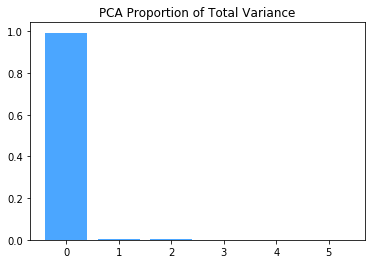

In [24]:
plt.bar(np.arange(len(pca_explained_variance)), pca_explained_variance, 
    color = 'dodgerblue', alpha = 0.8, align = 'center')
plt.title('PCA Proportion of Total Variance')
plt.show()

   eigenvalues  0
0     2.614442  1
1     0.119696  2
2     0.456738  3
3     1.030921  4
4     0.829769  5
5     0.948434  6
6          NaN  7
7          NaN  8
8          NaN  9


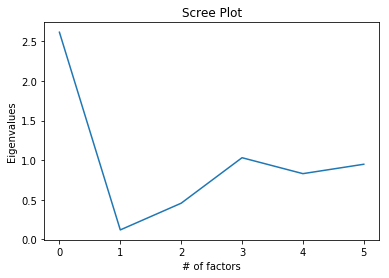

In [25]:
d = {'eigenvalues': eigenvalues }
df1 = pd.DataFrame(data=d)
df2 =pd.Series([1,2,3,4,5,6,7,8,9])
#df2 = {'factors': factors}
# merge eigenvalues with # of factors
result = pd.concat([df1, df2], axis=1, join_axes=[df2.index])
print (result)

def scat(dataframe,var1,var2):
    dataframe[var2].plot()     
    plt.title('Scree Plot')
    plt.xlabel('# of factors')
    plt.ylabel('Eigenvalues')
    
scat(result,'0','eigenvalues')
#retain two factors
plt.show()

In [26]:
pca_loadings = pca.components_.T

In [27]:
np.set_printoptions(precision = 3, suppress = True,
    formatter={'float': '{: 0.3f}'.format})
print(pca_loadings[:,0:3])

[[ 1.000 -0.014 -0.018]
 [ 0.000 -0.000 -0.000]
 [ 0.008  0.013  0.007]
 [ 0.000 -0.000 -0.002]
 [ 0.022  0.430  0.903]
 [ 0.005  0.903 -0.430]]


In [28]:
C = pca.transform(pca_data)

In [29]:
pca_data['pca1'] = C[:,0]
pca_data['pca2'] = C[:,1]
pca_data['pca3'] = C[:,2]

In [30]:
train['pca1'] = C[:,0]
train['pca2'] = C[:,1]
train['pca3'] = C[:,2]
print(train)
train.to_csv('train_PCA_1.csv')

      subclass zoning  lotfrontage  lotarea street alley lotshape landcontour  \
0           20     RL      10000.0    11838   Pave   NaN      Reg         Lvl   
1           60     RL         70.0     8304   Pave   NaN      IR1         Lvl   
2           45     RM         58.0     6380   Pave   NaN      Reg         Lvl   
3           60     RL      10000.0    14803   Pave   NaN      IR1         Lvl   
4           20     RL         91.0    11375   Pave   NaN      Reg         Lvl   
5           30     RL         55.0     7111   Pave   NaN      IR1         Bnk   
6           70     RM         60.0    11340   Pave   NaN      Reg         Lvl   
9          160     RL         24.0     2308   Pave   NaN      Reg         Lvl   
10          80     RL         62.0     7706   Pave   NaN      Reg         Lvl   
11          50     RM         50.0     5000   Pave   NaN      Reg         Lvl   
12          70     RL        144.0    21384   Pave   NaN      Reg         Lvl   
13         160     RM       

In [32]:
pca_scores = pca_data.loc[:,['pca1','pca2', 'pca3']]
pca_model_cormat = \
    np.corrcoef(pca_scores.as_matrix().transpose()).round(decimals=3)
print(pca_model_cormat)

[[ 1.000  0.000  0.000]
 [ 0.000  1.000 -0.000]
 [ 0.000 -0.000  1.000]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
PCA_2 = smf.ols(formula='saleprice ~ pca1+pca2', data=train).fit()
PCA_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.061e+09
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:59:56   Log-Likelihood:                -9013.1
No. Observations:                1645   AIC:                         1.803e+04
Df Residuals:                    1642   BIC:                         1.805e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.728e+05      1.431   1.21e+05      0.000    1.73e+05    1.73e+05
pca1           0.9997   2.17e-05   4.61e+04      0.000       1.000       1.000
pca2          -0.0139      0.000    -37.572      0.000      -0.015      -0.013
==============================================================================
Omnibus:                       48.395   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.260
Skew:                          -0.133   Prob(JB):                     8.43e-24
Kurtosis:                       4.216   Cond. No.                     6.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
predictions_1 = PCA_2.fittedvalues
predictions_1.head()

0    236450.972998
1    186990.404080
2    112981.462918
3    190020.904452
4    150054.968458
dtype: float64

In [38]:
test_predictions_1 = PCA_2.predict(test)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

PatsyError: Error evaluating factor: NameError: name 'pca1' is not defined
    saleprice ~ pca1+pca2
                ^^^^

In [ ]:
model1 = smf.ols(formula='saleprice ~ qualityindex+totalsqftcalc+C(lotconfig)+C(neighborhood)+C(housestyle)+yearbuilt+C(roofstyle)+C(heating)', data=train).fit()
model1.summary()

In [ ]:
predictions_1 = model1.fittedvalues
predictions_1.head()

In [ ]:
test_predictions_1 = model1.predict(test)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

In [ ]:
Strouse_TestPredictions_1.to_csv('logan_strouse_HW2_MODEL_1_NBGROUP.csv')

In [ ]:
PCA_MODEL = smf.ols(formula='saleprice ~principal_component_1+principal_component_2', data=finalDf).fit()
PCA_MODEL.summary()

In [ ]:
predictions_1 = PCA_MODEL.fittedvalues
predictions_1.head()

In [ ]:
test_predictions_1 = PCA_MODEL.predict(testfinalDf)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

In [ ]:
Strouse_TestPredictions_1.to_csv('logan_strouse_HW4_PCA_1_NBGROUP.csv')

In [ ]:
neighborhood_predictions = model1.fittedvalues
neighborhood_predictions.head()
tr = {'p_saleprice': neighborhood_predictions}
df1 = train[['index','saleprice','neighborhood','totalsqftcalc']]
df2=pd.DataFrame(data=tr)
n_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])

n_file['residual'] = (n_file.saleprice-n_file.p_saleprice)
n_file['actual_ppsf'] = (n_file.saleprice/n_file.totalsqftcalc)
n_file['predicted_ppsf'] = (n_file.p_saleprice/n_file.totalsqftcalc)
compare = n_file[['neighborhood','actual_ppsf','predicted_ppsf']]
compare.head()

In [ ]:
group1 = ['GrnHill', 'Blmngtn', 'NridgHt','Somerst','StoneBr','Timber','Gilbert','CollgCr','NoRidge']
group2 = ['Crawfor','Blueste','SawyerW','Greens','BrkSide','Veenker','Mitchel','IDOTRR','OldTown']
group3 = ['ClearCr','NWAmes','NPkVill','NAmes','Sawyer','Edwards','BrDale','SWISU','MeadowV']
c_2 = compare.copy()
#c_2['Neighborhood_Group'] = c_2['neighborhood'].copy()
#c_2['Neighborhood_Group'] = c_2['neighborhood'].isin(group1).astype('int64')
#c_2['Neighborhood_Group'] = c_2['neighborhood'].isin(group2).astype('int64',copy=False)
#c_2.loc[c_2.Neighborhood_Group == 'CollgCr'] = 1
#c_2
conditions = [
    (c_2['neighborhood'].isin(group1)),
    (c_2['neighborhood'].isin(group2)),
    (c_2['neighborhood'].isin(group3))]
choices = ['1', '2', '3']
c_2['Neighborhood_Group'] = np.select(conditions, choices, default='NA')
c_2

In [ ]:
import seaborn as sns
ax = sns.boxplot(x="neighborhood", y="residual", data=n_file)
ax.set_title("Residual by Neighborhood")
ax.set_ylabel("Residual")
ax.set_xlabel("Neighborhood")
plt.xticks(rotation=75)
plt.show()

In [ ]:
grouping = c_2[['neighborhood','actual_ppsf','predicted_ppsf','Neighborhood_Group']].groupby('neighborhood').mean()
grouping_sorted = grouping.sort_values(by=['actual_ppsf'], ascending=[False])
grouping_sorted
#neighborhoods sorted by actual ppsf

In [ ]:
grouping_sorted_1 = grouping_sorted.reset_index()

In [ ]:
grouping_sorted_1.iloc[1:]

In [ ]:
group1 = ['GrnHill', 'Blmngtn', 'NridgHt','Somerst','StoneBr','Timber','Gilbert','CollgCr','NoRidge']
group2 = ['Crawfor','Blueste','SawyerW','Greens','BrkSide','Veenker','Mitchel','IDOTRR','OldTown']
group3 = ['ClearCr','NWAmes','NPkVill','NAmes','Sawyer','Edwards','BrDale','SWISU','MeadowV']
conditions = [
    (grouping_sorted_1['neighborhood'].isin(group1)),
    (grouping_sorted_1['neighborhood'].isin(group2)),
    (grouping_sorted_1['neighborhood'].isin(group3))]
choices = ['1', '2', '3']
grouping_sorted_1['Neighborhood_Group'] = np.select(conditions, choices, default='NA')
print(grouping_sorted_1)